In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of src.data.standard_data_process failed: Traceback (most recent call last):
  File "/Users/rhysjones/Library/Caches/pypoetry/virtualenvs/e2sviz-a5C9iPYI-py3.11/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Users/rhysjones/Library/Caches/pypoetry/virtualenvs/e2sviz-a5C9iPYI-py3.11/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/Users/rhysjones/Library/CloudStorage/GoogleDrive-rhys.jones@e2s.energy/My Drive/e2sviz/notebooks

In [56]:
import sys
sys.path.insert(0, '..//')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from e2slib.utillib import dummy_data, functions
from src.data import manipulations, viz_schema, standard_data_process as sdp, data_preparation as dp, enums as viz_enums
from e2slib.structures import enums, datetime_schema
from datetime import datetime
from src.visualization import visualize, viz_types, plot_styles
from pathlib import Path

In [57]:
demand = dummy_data.create_dummy_site_demand(2022)

save_path = Path(r'/Users/rhysjones/Library/CloudStorage/GoogleDrive-rhys.jones@e2s.energy/Shared drives/e2s-softwares/Lyra/08 - Customers/06 - Bender/02 - Ressources/03 - Test data (EVs + Chargers)/submeter_data.csv')
bender_submeters = pd.read_csv(save_path, index_col=0, parse_dates=True)

### Data cleaner

Initialised with the data to be cleaned an a list of cleaners. The cleaners available are:

1. dp.OutlierRemover(method:str = 'iqr).datacleaner() - Only interquartile reange method currently in use.
2. dp.FillMissingData(func:str = 'rollingfill').datacleaner() - func can be rollingfill & meanfill. If rollingfill leaves NaN values mean is used.
3. dp.GenerateDatetime(start_date: datetime = datetime(2022, 1, 1), freq: str = '30T', periods: int = 48, tz: str = 'UTC') - applies datetime to your dataset.


In [58]:
cleaner_list = [dp.OutlierRemover().data_cleaner, dp.FillMissingData().data_cleaner]

test = sdp.DataPrep(bender_submeters, cleaner_list)

Prior to cleaning:


,DB_11,DB_3,DB_4,DB_5,DB_6,DB_9,DB_10,DB_12
Count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
NaN Count,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mean,4.197614,0.833613,0.682970,0.640112,0.225324,1.463343,0.820420,0.886015
StD,4.335921,0.379993,1.065927,0.078980,0.537946,1.049702,0.762795,1.426734
Min,0.238472,0.430443,0.035838,0.453167,0.000000,1.028566,0.364034,0.039552
1%,0.313950,0.475305,0.036824,0.498025,0.010134,1.041814,0.384565,0.040023
25%,0.793048,0.613206,0.038633,0.580715,0.024653,1.188752,0.422485,0.046133
50%,2.450148,0.682368,0.040107,0.668872,0.025688,1.230843,0.493701,0.050163
75%,6.212515,0.885478,1.018641,0.686295,0.028907,1.275557,0.702320,0.898992
99%,17.665151,2.259092,3.377291,0.858160,2.359133,7.174533,3.867978,4.021694


Post cleaning:


,DB_11,DB_3,DB_4,DB_5,DB_6,DB_9,DB_10,DB_12
Count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
NaN Count,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mean,3.871877,0.723830,0.321299,0.636369,0.025243,1.203781,0.509493,0.177645
StD,3.616988,0.173279,0.580963,0.072358,0.002469,0.083532,0.122784,0.330845
Min,0.238472,0.430443,0.035838,0.453167,0.018273,1.058588,0.364034,0.039552
1%,0.313950,0.475305,0.036824,0.498025,0.018813,1.060478,0.384565,0.040023
25%,0.793048,0.611870,0.038633,0.580715,0.024502,1.149817,0.422485,0.046129
50%,2.446349,0.673542,0.040107,0.668476,0.025496,1.220203,0.482347,0.050143
75%,6.058010,0.775172,0.216827,0.685800,0.026099,1.269096,0.548906,0.116300
99%,13.523658,1.259118,2.419109,0.830969,0.033966,1.307534,1.018762,1.767503


### DataManip

Takes data & meta data and manipulates the data as requested.

In [59]:
metadata_dict = {'DB_11': {'Name': 'DB_11', 
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'SI': viz_enums.SIUnits.K,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'DB_3': {'Name': 'DB_3',
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'SI': viz_enums.SIUnits.K,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'DB_4': {'Name': 'DB_4',
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'SI': viz_enums.SIUnits.K,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'DB_5': {'Name': 'DB_5',
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'SI': viz_enums.SIUnits.K,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'DB_6': {'Name': 'DB_6',
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'SI': viz_enums.SIUnits.K,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'DB_9': {'Name': 'DB_9',
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'SI': viz_enums.SIUnits.K,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'DB_10': {'Name': 'DB_10',
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'SI': viz_enums.SIUnits.K,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT},
                      'DB_12': {'Name': 'DB_12',
                                  'Units': viz_enums.UnitsSchema.WH,
                                  'SI': viz_enums.SIUnits.K,
                                  'Freq': viz_schema.FrequencySchema.HH,
                                  'Type': viz_enums.DataType.FLOAT}}

In [60]:
meta_data = sdp.MetaData(metadata_dict)

new_test = sdp.DataManip(test.data, column_meta_data=meta_data)

### DataViz

How plots will be generated.

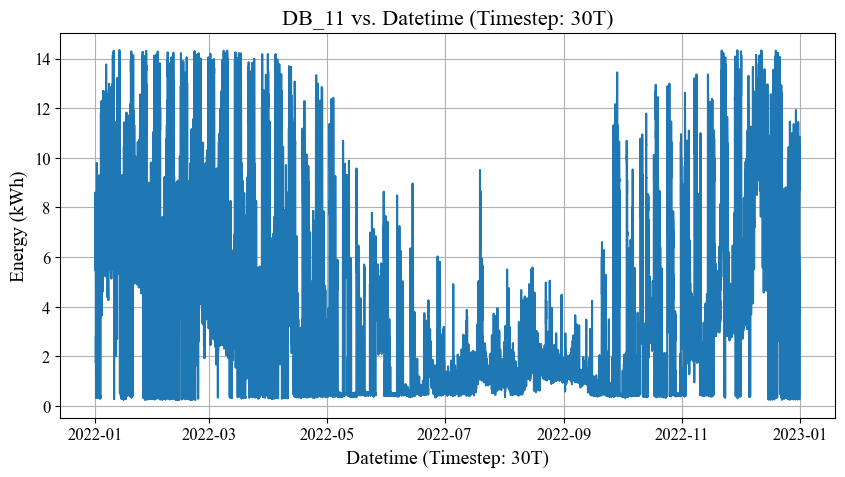

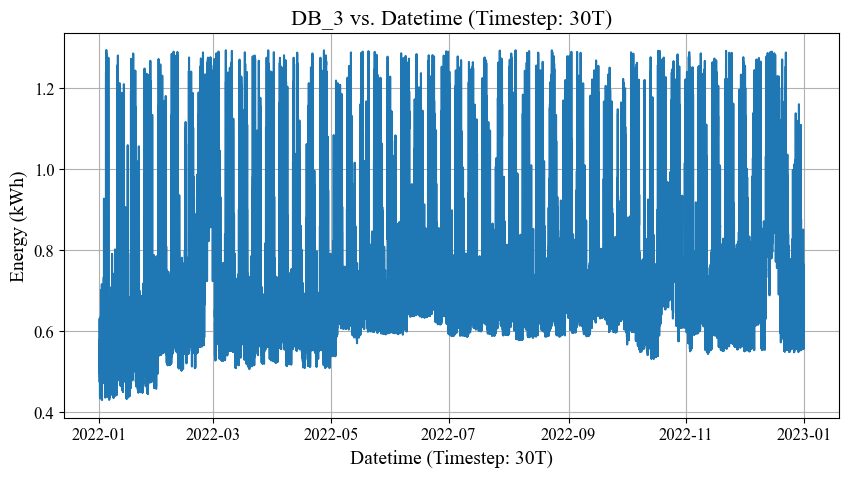

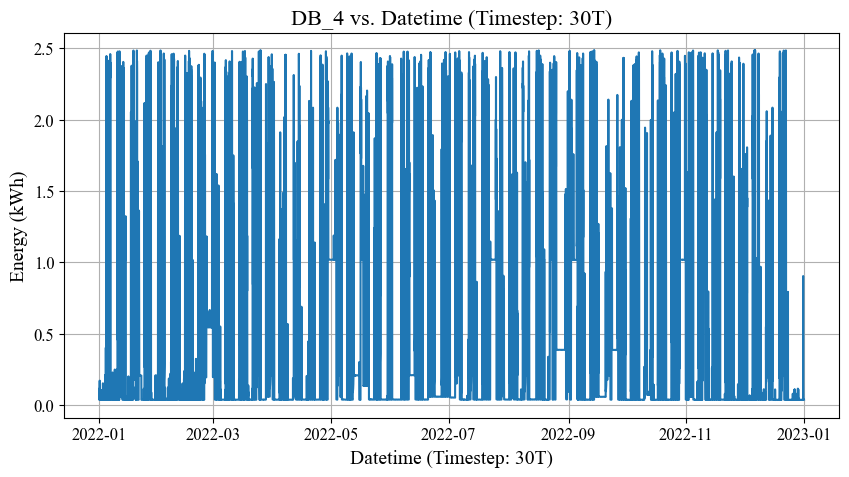

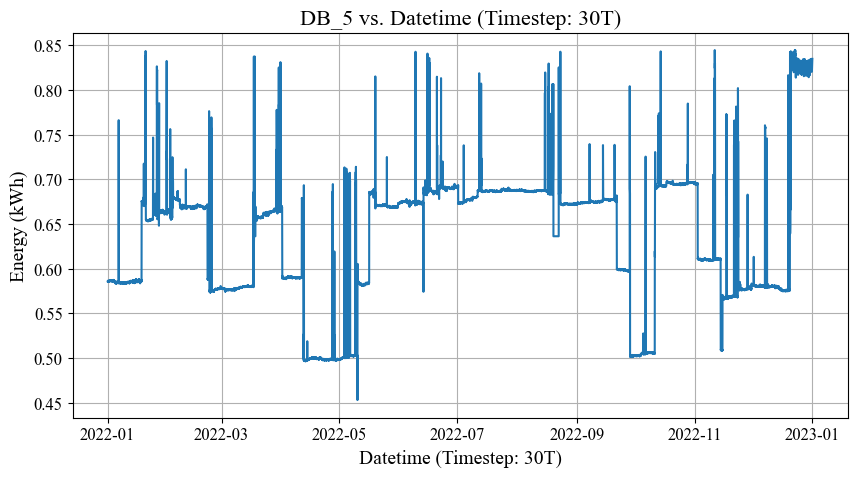

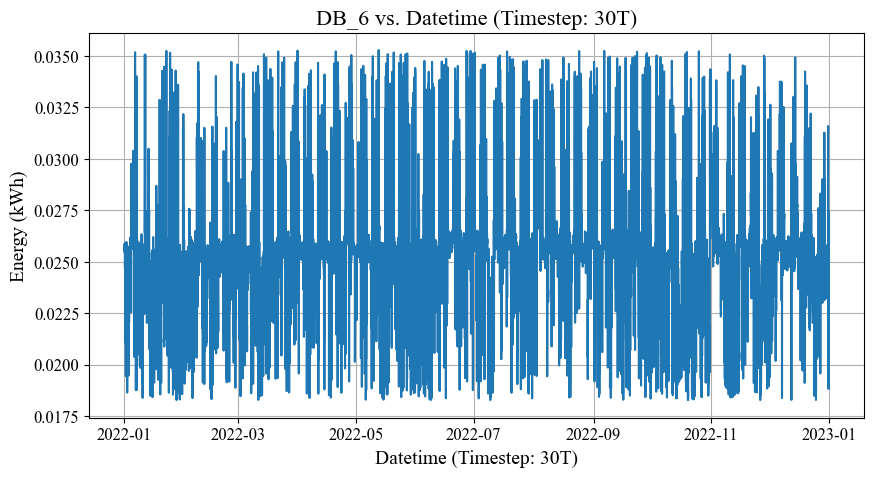

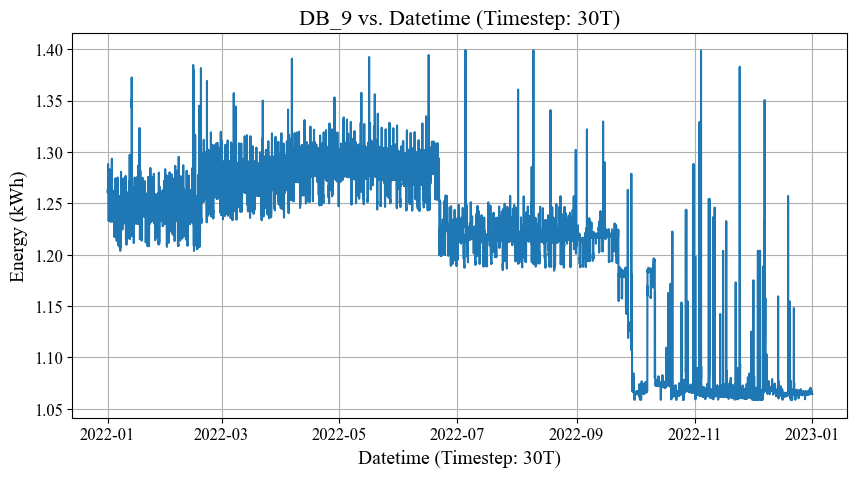

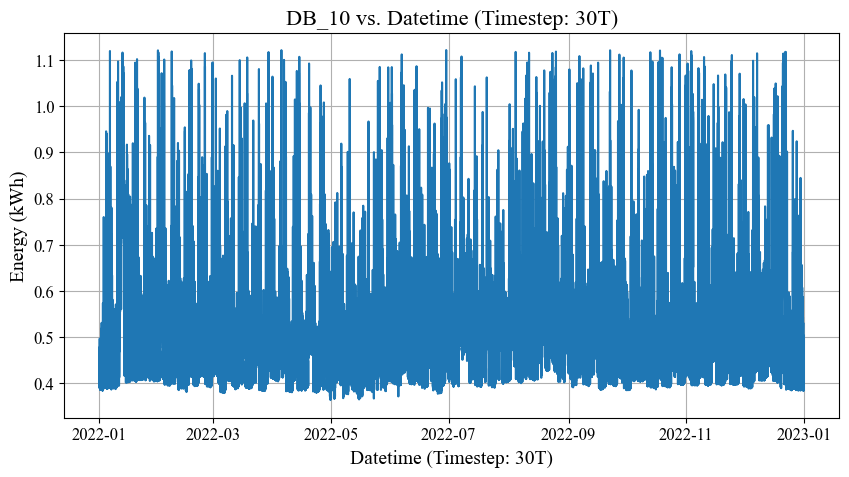

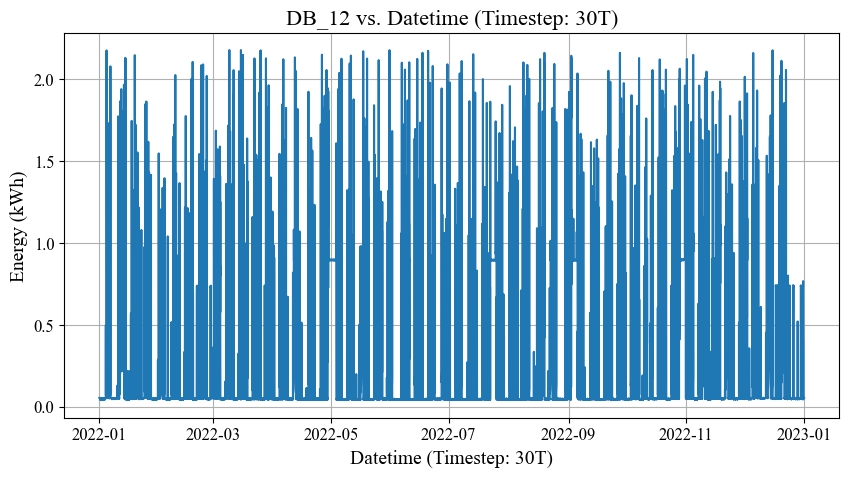

In [61]:
visualize.DataViz(new_test, plot_styles.MatPlotLibPlot()).single_plot()

In [62]:
new_test.groupby(viz_schema.GroupingKeySchema.DAY) # Average weekday/weekend day for the year.

DB_11      DB_3      DB_4      DB_5      DB_6  \
Weekday flag Half-hour                                                     
weekday      0          3.557335  0.653579  0.101140  0.634422  0.024744   
             1          3.657236  0.652101  0.097810  0.634454  0.024767   
             2          3.534008  0.654205  0.097733  0.634395  0.024594   
             3          3.572461  0.645866  0.097085  0.634444  0.024830   
             4          3.653572  0.652676  0.099584  0.634475  0.024759   
...                          ...       ...       ...       ...       ...   
weekend      43         4.081793  0.644050  0.145903  0.631326  0.024802   
             44         4.120320  0.646592  0.146993  0.631369  0.024602   
             45         4.183588  0.668668  0.146431  0.631386  0.024620   
             46         4.143449  0.642716  0.146604  0.631401  0.024471   
             47         4.267993  0.645755  0.150866  0.631303  0.024502   

                            DB_9     DB_10     DB_12  
Weekday flag Half-hour                                
weekday      0          1.211840  0.475129  0.083767  
             1          1.210983  0.474162  0.084084  
             2          1.212234  0.490316  0.088627  
             3          1.211533  0.484748  0.084764  
             4          1.212078  0.481774  0.089015  
...                          ...       ...       ...  
weekend      43         1.215177  0.462368  0.116421  
             44         1.216159  0.458299  0.115741  
             45         1.216095  0.464553  0.115079  
             46         1.215745  0.454471  0.115390  
             47         1.215895  0.459372  0.115082  

[96 rows x 8 columns]

In [63]:
new_test.groupby(datetime_schema.DateTimeSchema.WEEK) # Average week of a year.

DB_11      DB_3      DB_4      DB_5      DB_6  \
Day of week Half-hour                                                     
0           0          4.471906  0.656487  0.157638  0.629486  0.024323   
            1          4.453231  0.649388  0.147937  0.629543  0.024375   
            2          4.287749  0.652733  0.145131  0.629433  0.024375   
            3          4.477437  0.640151  0.142739  0.629310  0.024599   
            4          4.625442  0.651036  0.149415  0.629364  0.024452   
...                         ...       ...       ...       ...       ...   
6           43         4.296010  0.642507  0.144355  0.629470  0.024863   
            44         4.324036  0.643582  0.145246  0.629517  0.024595   
            45         4.392815  0.676346  0.146400  0.629482  0.024731   
            46         4.342168  0.637497  0.143418  0.629516  0.024683   
            47         4.398645  0.642065  0.150997  0.629459  0.024570   

                           DB_9     DB_10     DB_12  
Day of week Half-hour                                
0           0          1.214998  0.461692  0.114486  
            1          1.215100  0.467671  0.116005  
            2          1.215507  0.466619  0.116409  
            3          1.214776  0.446782  0.118056  
            4          1.215036  0.469706  0.131286  
...                         ...       ...       ...  
6           43         1.216480  0.445303  0.117846  
            44         1.217811  0.462154  0.117909  
            45         1.217998  0.464032  0.114923  
            46         1.217153  0.455502  0.117360  
            47         1.216763  0.462655  0.114461  

[336 rows x 8 columns]

<Axes: xlabel='Month,Half-hour'>

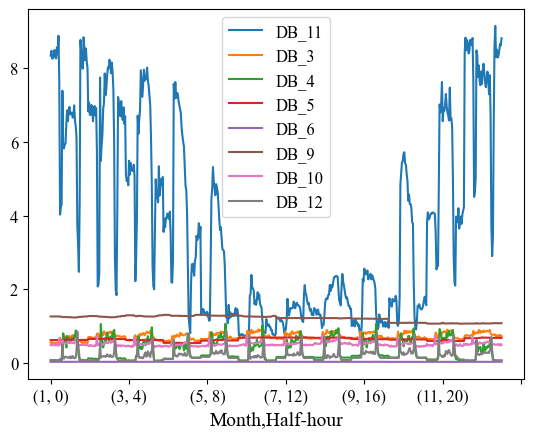

In [64]:
new_test.groupby(datetime_schema.DateTimeSchema.MONTH).plot() # Average day for each month across the year.

In [65]:
new_test.groupby(viz_schema.GroupingKeySchema.DAY_SEASON) # Average weekday/weekend day for each season across the year.

DB_11      DB_3      DB_4      DB_5  \
season Weekday flag Half-hour                                           
AUTUMN weekday      0          1.414321  0.668580  0.108394  0.636795   
                    1          1.437801  0.668905  0.108198  0.636738   
                    2          1.336069  0.667040  0.108178  0.636698   
                    3          1.377252  0.657459  0.108211  0.636775   
                    4          1.397547  0.671628  0.108232  0.636776   
...                                 ...       ...       ...       ...   
WINTER weekend      43         7.515187  0.631989  0.070630  0.627678   
                    44         7.580292  0.641203  0.073224  0.627857   
                    45         7.567763  0.670230  0.071846  0.627922   
                    46         7.597633  0.649059  0.072317  0.627957   
                    47         7.940252  0.644165  0.082782  0.627809   

                                   DB_6      DB_9     DB_10     DB_12  
season Weekday flag Half-hour                                          
AUTUMN weekday      0          0.024547  1.140280  0.473697  0.086659  
                    1          0.024415  1.139771  0.453042  0.087264  
                    2          0.024268  1.141012  0.482556  0.099457  
                    3          0.024674  1.140624  0.471039  0.086667  
                    4          0.024403  1.140253  0.473180  0.086654  
...                                 ...       ...       ...       ...  
WINTER weekend      43         0.024772  1.198426  0.465277  0.054604  
                    44         0.024690  1.198557  0.460494  0.054809  
                    45         0.024778  1.198323  0.461309  0.054289  
                    46         0.024779  1.196970  0.437448  0.055095  
                    47         0.024635  1.197795  0.462490  0.054423  

[384 rows x 8 columns]

In [66]:
new_test.groupby(viz_schema.GroupingKeySchema.WEEK_SEASON) # Average week for each season across the year.

DB_11      DB_3      DB_4      DB_5  \
season Day of week Half-hour                                           
AUTUMN 0           0          1.700082  0.645084  0.297057  0.635163   
                   1          1.909200  0.675231  0.296773  0.635254   
                   2          1.511414  0.638778  0.296723  0.635167   
                   3          1.599239  0.655879  0.296802  0.635145   
                   4          1.401868  0.694576  0.296740  0.635219   
...                                ...       ...       ...       ...   
WINTER 6           43         7.979490  0.627684  0.069185  0.622942   
                   44         7.970836  0.645365  0.071343  0.623165   
                   45         7.965739  0.672010  0.074174  0.623102   
                   46         8.152764  0.623959  0.066804  0.623196   
                   47         8.366535  0.636729  0.085593  0.623093   

                                  DB_6      DB_9     DB_10     DB_12  
season Day of week Half-hour                                          
AUTUMN 0           0          0.023803  1.144233  0.439777  0.236582  
                   1          0.024318  1.143230  0.445070  0.236663  
                   2          0.024309  1.144225  0.464479  0.236215  
                   3          0.024419  1.143791  0.437467  0.236310  
                   4          0.024353  1.143732  0.466924  0.236222  
...                                ...       ...       ...       ...  
WINTER 6           43         0.024808  1.201088  0.449208  0.053469  
                   44         0.024760  1.201851  0.468379  0.057332  
                   45         0.024926  1.201952  0.452069  0.052338  
                   46         0.024851  1.199548  0.436767  0.058467  
                   47         0.024941  1.200253  0.458617  0.051345  

[1344 rows x 8 columns]

In [67]:
# test_groupby = new_test.groupby()
# test_groupby['DB_10'].plot()
# test_groupby

In [68]:
# test_groupby.index

In [69]:
# test_resample = new_test.resample(freq='M', func=np.sum)
# test_resample['DB_10'].plot(kind='bar')
# test_resample['DB_10']

In [70]:
# test_filter = new_test.filter(year=[2022], month=[2], day=[3], hour=[8,9,10,11,12,13,14,15,16,17])
# test_filter['DB_10'].plot()
# test_filter['DB_10']

### Column meta data + timeseries classes

In [71]:
# db_11 = sdp.ColumnVizData(testing_submeters['DB_11'], example_data_dict['column_1'])


In [72]:
# column_lists = sdp.generate_column_classes(testing_submeters, example_data_dict)


### Idea of next step

In [73]:
# data_to_plot = new_test.filter()

# new_test.plot(matplotlibViz)

# def plot(self, list_col_to_plot:list[tuple[str,...]]|None=None, viz:LibraryViz)
  
#   for c in list_col_to_plot:
#     key_args = self.get_metatdata(c)
#     viz.plot(data_to_plot[c], key_args )

---

## Secondary example

In [74]:
# import src.chpqa_test_files.import_data as import_data

# user_path =  Path(r"/Users/rhysjones/Library/CloudStorage/GoogleDrive-rhys.jones@e2s.energy/Shared drives/") # Rhys
# #user_path =  Path(r"/Users/sceac10/Library/CloudStorage/GoogleDrive-alexandre.canet@e2s.energy/Shared drives/") # Alex
# path = user_path / r"e2s-softwares/Lyra/06 - Prototypes/CHPQA/03 - Data/"

# dataf = import_data.compile_data(path).pipe(import_data.clean_data).pipe(import_data.transform_raw_dataf)
# dataf = dataf.loc[dataf.index.drop_duplicates()]

In [75]:
# cleaner_list = [dp.OutlierRemover().data_cleaner, dp.FillMissingData().data_cleaner]

# test = sdp.DataPrep(dataf, cleaner_list)

In [76]:
# chpqa_data_dict = {'column_1': {'Name': 'CHP_electricity', 
#                                   'Units': viz_enums.UnitsSchema.MWH,
#                                   'Freq': viz_schema.FrequencySchema.HH,
#                                   'Type': viz_enums.DataType.FLOAT},
#                   'column_2': {'Name': 'CHP_total_heat', 
#                                   'Units': viz_enums.UnitsSchema.MWH,
#                                   'Freq': viz_schema.FrequencySchema.HH,
#                                   'Type': viz_enums.DataType.FLOAT},
#                   'column_3': {'Name': 'CHP_heat', 
#                                   'Units': viz_enums.UnitsSchema.MWH,
#                                   'Freq': viz_schema.FrequencySchema.HH,
#                                   'Type': viz_enums.DataType.FLOAT},
#                   'column_4': {'Name': 'CHP_gas', 
#                                   'Units': viz_enums.UnitsSchema.SM3,
#                                   'Freq': viz_schema.FrequencySchema.HH,
#                                   'Type': viz_enums.DataType.FLOAT},
#                   'column_5': {'Name': 'Boiler_1_heat', 
#                                   'Units': viz_enums.UnitsSchema.MWH,
#                                   'Freq': viz_schema.FrequencySchema.HH,
#                                   'Type': viz_enums.DataType.FLOAT},
#                   'column_6': {'Name': 'Boiler_2_heat', 
#                                   'Units': viz_enums.UnitsSchema.MWH,
#                                   'Freq': viz_schema.FrequencySchema.HH,
#                                   'Type': viz_enums.DataType.FLOAT},
#                   'column_7': {'Name': 'Boiler_3_heat', 
#                                   'Units': viz_enums.UnitsSchema.MWH,
#                                   'Freq': viz_schema.FrequencySchema.HH,
#                                   'Type': viz_enums.DataType.FLOAT},
#                   'column_8': {'Name': 'Boiler_1_gas', 
#                                   'Units': viz_enums.UnitsSchema.SM3,
#                                   'Freq': viz_schema.FrequencySchema.HH,
#                                   'Type': viz_enums.DataType.FLOAT},
#                   'column_9': {'Name': 'Boiler_2_gas', 
#                                   'Units': viz_enums.UnitsSchema.SM3,
#                                   'Freq': viz_schema.FrequencySchema.HH,
#                                   'Type': viz_enums.DataType.FLOAT},
#                   'column_10': {'Name': 'Boiler_3_gas', 
#                                   'Units': viz_enums.UnitsSchema.SM3,
#                                   'Freq': viz_schema.FrequencySchema.HH,
#                                   'Type': viz_enums.DataType.FLOAT},
#                   'column_11': {'Name': 'Total_heat_MWh', 
#                                   'Units': viz_enums.UnitsSchema.MWH,
#                                   'Freq': viz_schema.FrequencySchema.HH,
#                                   'Type': viz_enums.DataType.FLOAT},
#                   'column_12': {'Name': 'Total_gas_MWh', 
#                                   'Units': viz_enums.UnitsSchema.SM3,
#                                   'Freq': viz_schema.FrequencySchema.HH,
#                                   'Type': viz_enums.DataType.FLOAT}}

In [77]:
# column_lists = sdp.generate_column_classes(dataf, chpqa_data_dict)

In [78]:
# column_lists[0].data.min()

In [79]:
# data_with_meta.groupby('day', )
# matplotlib_viz = MatplotlibViz()


# def single_timeserie_plot(libraryViz, data, **kwargs):
#     libraryViz.basic_plot(data, **kwargs)


In [80]:
# for i in range(len(column_lists)):
#     column_lists[i].plot_all()